In [47]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

from __future__ import division

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('Food_Inspections.csv')
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2079132,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
1,2079129,JET'S PIZZA,JET'S PIZZA,2522268.0,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,60607.0,08/28/2017,License,Not Ready,NaN,41.881572,-87.653052,"(41.88157249576794, -87.65305233593274)"
2,2079125,ROOM 1520,ROOM 1520,2446638.0,Special Event,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,60607.0,08/28/2017,License Re-Inspection,Not Ready,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.886577,-87.665328,"(41.88657652150854, -87.66532812140231)"
3,2079123,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
4,2079105,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639.0,08/28/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)"


In [3]:
df.columns

Index([u'Inspection ID', u'DBA Name', u'AKA Name', u'License #',
       u'Facility Type', u'Risk', u'Address', u'City', u'State', u'Zip',
       u'Inspection Date', u'Inspection Type', u'Results', u'Violations',
       u'Latitude', u'Longitude', u'Location'],
      dtype='object')

In [4]:
df.describe()

,Inspection ID,License #,Zip,Latitude,Longitude
count,1.538100e+05,1.537950e+05,153712.000000,153266.000000,153266.000000
mean,1.238655e+06,1.517483e+06,60629.004795,41.879852,-87.676471
std,5.582027e+05,8.799955e+05,22.605480,0.081235,0.058835
min,4.424700e+04,0.000000e+00,60007.000000,41.644670,-87.914428
25%,6.643452e+05,1.139359e+06,60614.000000,41.829990,-87.708000
50%,1.361446e+06,1.914680e+06,60625.000000,41.891405,-87.666901
75%,1.578391e+06,2.153526e+06,60643.000000,41.939409,-87.634603
max,2.079219e+06,9.999999e+06,60827.000000,42.021064,-87.525094


In this raw dataset, we have 17 columns in this data set, each with over 153,000 data points.

In [5]:
df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending=False)

Violations         30798
Facility Type       4560
AKA Name            2543
Location             544
Longitude            544
Latitude             544
City                 159
Zip                   98
Risk                  66
License #             15
State                  8
Inspection Type        1
dtype: int64

In [6]:
df.apply(lambda x: sum(x.isnull().values)/len(x), axis = 0)\
[df.isnull().sum() != 0].sort_values(ascending=False).mul(100)

Violations         20.023406
Facility Type       2.964697
AKA Name            1.653339
Location            0.353683
Longitude           0.353683
Latitude            0.353683
City                0.103374
Zip                 0.063715
Risk                0.042910
License #           0.009752
State               0.005201
Inspection Type     0.000650
dtype: float64

So it looks like violations has the most missing values (which makes sense that if there are no violations, then there's no need to input anything.)

In [7]:
df.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
dtype: object

In [8]:
df.get_dtype_counts()

float64     4
int64       1
object     12
dtype: int64

In [9]:
df = df[pd.notnull(df['Zip'])]

In [10]:
df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending=False)

Violations         30755
Facility Type       4557
AKA Name            2513
Location             534
Longitude            534
Latitude             534
City                  67
Risk                  66
License #             15
State                  8
Inspection Type        1
dtype: int64

After removing the null values from the Zip column, we've converted the zipcodes from float values to int values.

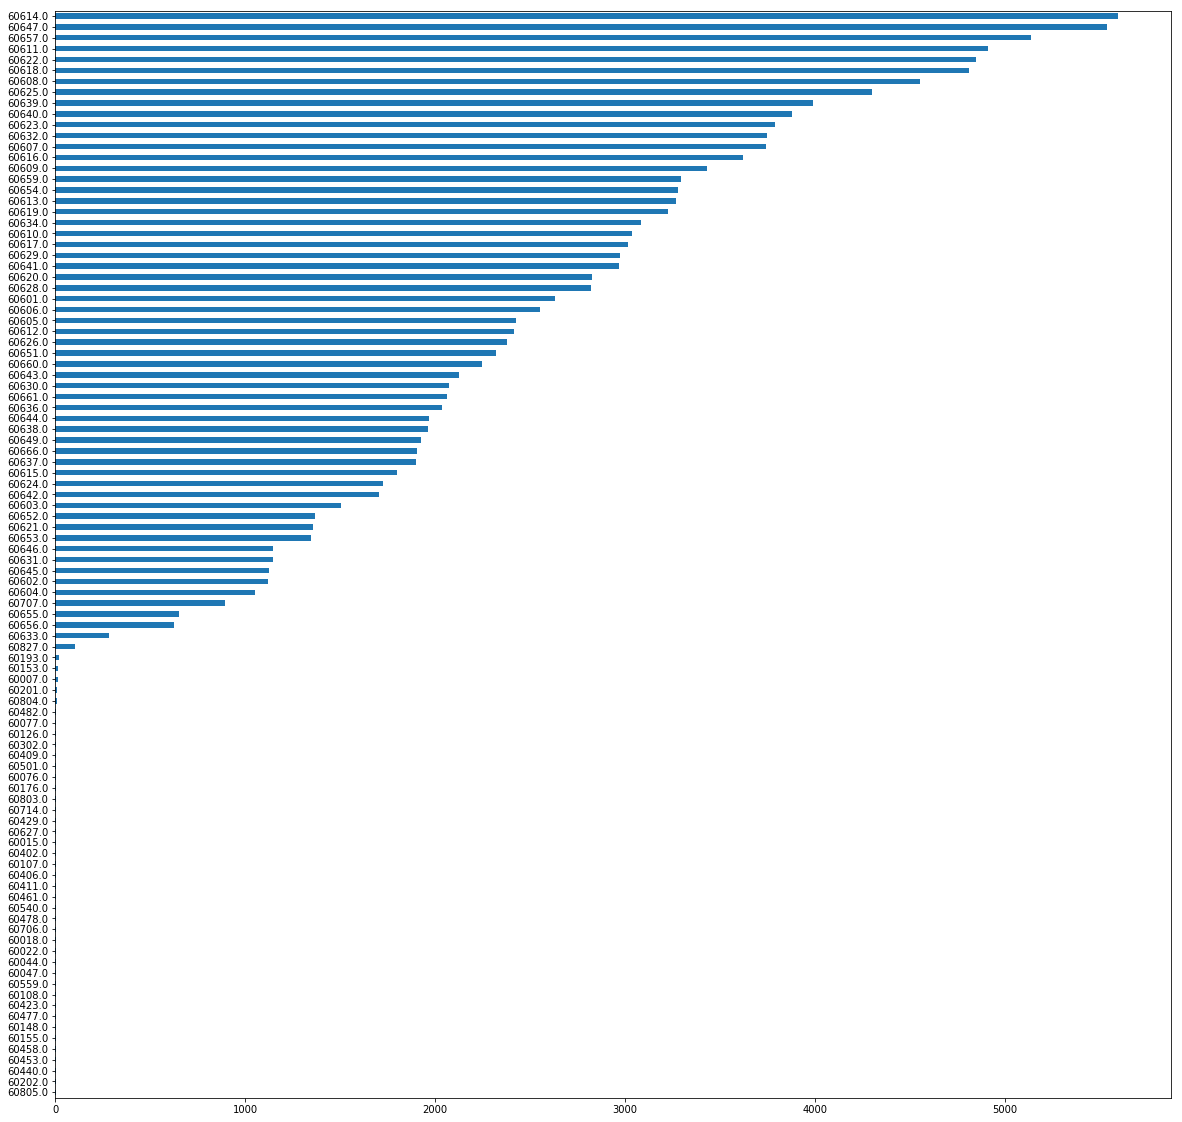

In [11]:
df['Zip'].value_counts(ascending=True).plot(kind='barh', figsize=(20,20));

In [12]:
df['Zip'].value_counts()

60614.0    5598
60647.0    5536
60657.0    5140
60611.0    4910
60622.0    4846
60618.0    4809
60608.0    4556
60625.0    4301
60639.0    3990
60640.0    3878
60623.0    3788
60632.0    3749
60607.0    3744
60616.0    3620
60609.0    3433
60659.0    3294
60654.0    3279
60613.0    3268
60619.0    3227
60634.0    3085
60610.0    3039
60617.0    3016
60629.0    2972
60641.0    2970
60620.0    2828
60628.0    2819
60601.0    2629
60606.0    2553
60605.0    2428
60612.0    2414
           ... 
60076.0       3
60176.0       3
60803.0       3
60714.0       3
60429.0       3
60627.0       2
60015.0       2
60402.0       2
60107.0       2
60406.0       2
60411.0       2
60461.0       2
60540.0       2
60478.0       1
60706.0       1
60018.0       1
60022.0       1
60044.0       1
60047.0       1
60559.0       1
60108.0       1
60423.0       1
60477.0       1
60148.0       1
60155.0       1
60458.0       1
60453.0       1
60440.0       1
60202.0       1
60805.0       1
Name: Zip, Length: 100, 

Looking at the various zip codes, it looks like there are a lot of zipcodes that only have a handful of observations in them. I;m not sure if they would be noise in the model, so it would probably be smart to drop any zip code that has under 50 observations. 

In [13]:
threshold = 50
value_counts = df['Zip'].value_counts()
to_remove = value_counts[value_counts <= threshold].index
df.replace(to_remove, np.nan, inplace = True)

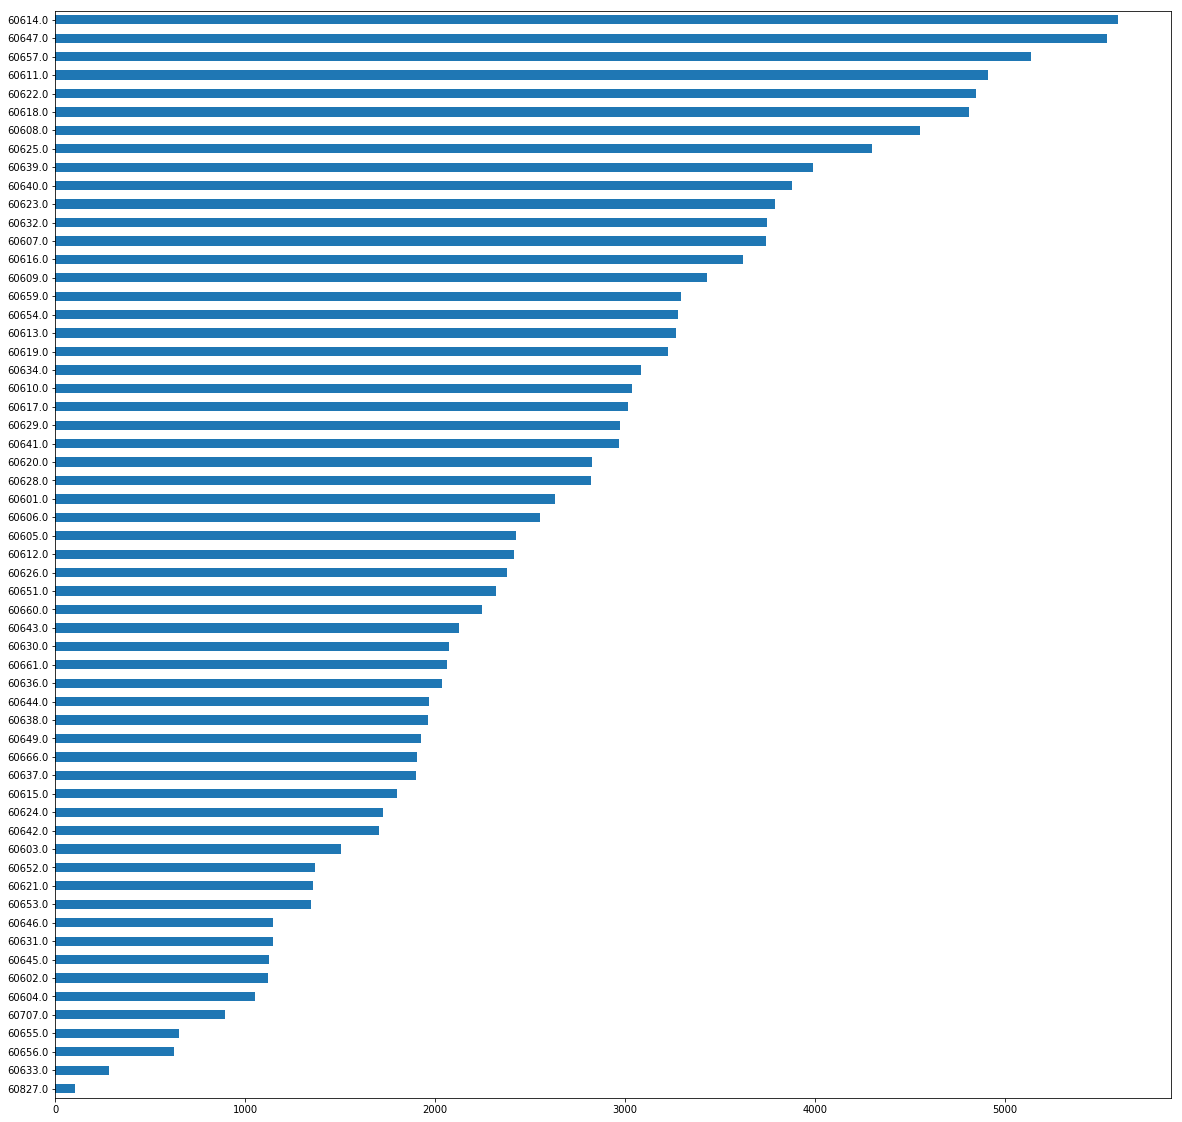

In [14]:
df['Zip'].value_counts(ascending=True).plot(kind='barh', figsize=(20,20));

In [15]:
df = df[np.isfinite(df['Zip'])]

In [16]:
df['Zip'] = df['Zip'].astype(int)
df['Zip'].value_counts()

60614    5598
60647    5536
60657    5140
60611    4910
60622    4846
60618    4809
60608    4556
60625    4301
60639    3990
60640    3878
60623    3788
60632    3749
60607    3744
60616    3620
60609    3433
60659    3294
60654    3279
60613    3268
60619    3227
60634    3085
60610    3039
60617    3016
60629    2972
60641    2970
60620    2828
60628    2819
60601    2629
60606    2553
60605    2428
60612    2414
60626    2378
60651    2318
60660    2245
60643    2124
60630    2071
60661    2064
60636    2038
60644    1969
60638    1963
60649    1927
60666    1902
60637    1900
60615    1801
60624    1727
60642    1703
60603    1506
60652    1369
60621    1359
60653    1347
60646    1147
60631    1146
60645    1127
60602    1122
60604    1052
60707     893
60655     653
60656     623
60633     282
60827     105
Name: Zip, dtype: int64

It looks like we succesfully removed all the zipcodes that have fewer than 50 observations (Thank you based stackoverflow)

In [17]:
df['Results'].value_counts()

Pass                    90371
Fail                    29793
Pass w/ Conditions      14520
Out of Business         13771
No Entry                 4255
Not Ready                 812
Business Not Located       58
Name: Results, dtype: int64

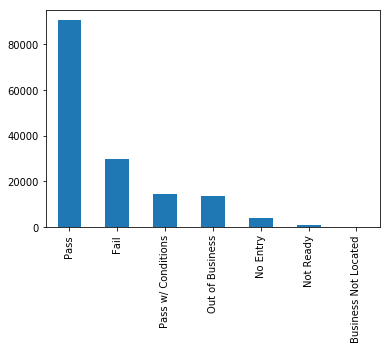

In [18]:
df['Results'].value_counts().plot(kind='bar')

Since there are conditional passes and other categories that don't directly relate to pass/fail, I will exclude those from the data as well. (edit: It's hard to define what "Pass w/ conditions" means relative to pass/fail, so I decided to exclude it entirely as a value) 

In [19]:
df_cleaner = df[(df['Results'] == 'Fail') | (df['Results'] == 'Pass')]

In [20]:
df_cleaner['Results'].value_counts()

Pass    90371
Fail    29793
Name: Results, dtype: int64

We've successfully isolated the rows that have either pass or fail in the Result column.

In [21]:
# creating a crosstab for zipcode and pass/fail
zip_result = pd.crosstab(df_cleaner['Zip'], df_cleaner['Results'], rownames=['Zip'], colnames=['Pass/Fail'])
zip_result

Pass/Fail,Fail,Pass
Zip,,
60601,343,1834
60602,170,778
60603,203,1006
60604,131,694
60605,345,1534
60606,325,1678
60607,743,2275
60608,944,2635
60609,664,2095


In [22]:
# showing the % of pass/fail for each zipcode
zip_result.apply(lambda x: x/x.sum(), axis=1)

Pass/Fail,Fail,Pass
Zip,,
60601,0.157556,0.842444
60602,0.179325,0.820675
60603,0.167907,0.832093
60604,0.158788,0.841212
60605,0.183608,0.816392
60606,0.162257,0.837743
60607,0.246190,0.753810
60608,0.263761,0.736239
60609,0.240667,0.759333


In [23]:
# changing Results column from pass/fail to 0/1
df_cleaner['Results'] = df_cleaner['Results'].apply(lambda x: 1 if x == 'Pass' else 0)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
risk_dummy = pd.get_dummies(df_cleaner['Risk'])
risk_dummy.head()

,All,Risk 1 (High),Risk 2 (Medium),Risk 3 (Low)
0,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,1,0,0


In [25]:
df_cleaner = df_cleaner.join(risk_dummy)


In [26]:
df_cleaner.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Inspection Type,Results,Violations,Latitude,Longitude,Location,All,Risk 1 (High),Risk 2 (Medium),Risk 3 (Low)
0,2079132.0,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616,...,License,1,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)",0,1,0,0
3,2079123.0,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616,...,License,1,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)",0,1,0,0
4,2079105.0,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639,...,License Re-Inspection,1,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)",0,1,0,0
5,2079104.0,SHRIMP'S FISH CHICKEN,SHRIMP'S FISH CHICKEN,2549497.0,Restaurant,Risk 2 (Medium),4355 S COTTAGE GROVE AVE,CHICAGO,IL,60653,...,License,0,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.815197,-87.606531,"(41.81519729173754, -87.60653088909952)",0,0,1,0
6,2079091.0,ART'S DRIVE INN,ART'S DRIVE INN,64682.0,Restaurant,Risk 1 (High),1333 W NORTH AVE,CHICAGO,IL,60622,...,Canvass,0,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.910601,-87.661863,"(41.910600662840906, -87.66186347385191)",0,1,0,0


In [27]:
df_cleaner.isnull().sum()[df_cleaner.isnull().sum() != 0].sort_values(ascending=False)

Violations         12035
AKA Name            1745
Facility Type        626
Location             346
Longitude            346
Latitude             346
City                  54
Risk                  36
License #             20
Inspection ID         15
State                  7
Inspection Type        1
dtype: int64

It looks like we still need to clear out some null values. Since I plan on using risk in my model, it would be wise to remove the null values from there as well.

In [28]:
df_cleaner = df_cleaner[pd.notnull(df_cleaner['Risk'])]

# I kid you not, I found this function in a response from Wes McKinney on stack overflow. The dude is a wizard.

In [29]:
# Checking to see Wes McKinney's sorcery at work
df_cleaner.isnull().sum()[df_cleaner.isnull().sum() != 0].sort_values(ascending=False)

Violations         12001
AKA Name            1734
Facility Type        606
Location             346
Longitude            346
Latitude             346
City                  53
License #             20
Inspection ID         15
State                  7
Inspection Type        1
dtype: int64

So it looks like we have gotten rid of the null values under Risk

In [30]:
df_cleaner['City'].value_counts()

CHICAGO            119730
Chicago               203
chicago                71
CCHICAGO               35
CHicago                 9
CHCHICAGO               6
CHESTNUT STREET         6
CHICAGOCHICAGO          5
CHARLES A HAYES         3
CHCICAGO                2
CHICAGOI                2
312CHICAGO              1
BEDFORD PARK            1
BURNHAM                 1
Name: City, dtype: int64

In [31]:
df_cleaner['City'] = df_cleaner['City'].str.upper()

In [32]:
# Filtering out just chicago. Too lazy to apply lower/upper function to make differently capitalized versions included in dataset
df_cleaner = df_cleaner[df_cleaner['City'] == 'CHICAGO']
df_cleaner.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Inspection Type,Results,Violations,Latitude,Longitude,Location,All,Risk 1 (High),Risk 2 (Medium),Risk 3 (Low)
0,2079132.0,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616,...,License,1,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)",0,1,0,0
3,2079123.0,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616,...,License,1,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)",0,1,0,0
4,2079105.0,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639,...,License Re-Inspection,1,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)",0,1,0,0
5,2079104.0,SHRIMP'S FISH CHICKEN,SHRIMP'S FISH CHICKEN,2549497.0,Restaurant,Risk 2 (Medium),4355 S COTTAGE GROVE AVE,CHICAGO,IL,60653,...,License,0,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.815197,-87.606531,"(41.81519729173754, -87.60653088909952)",0,0,1,0
6,2079091.0,ART'S DRIVE INN,ART'S DRIVE INN,64682.0,Restaurant,Risk 1 (High),1333 W NORTH AVE,CHICAGO,IL,60622,...,Canvass,0,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.910601,-87.661863,"(41.910600662840906, -87.66186347385191)",0,1,0,0


In [33]:
zip_dummy = pd.get_dummies(df_cleaner['Zip'], drop_first=True)
zip_dummy.columns

Int64Index([60602, 60603, 60604, 60605, 60606, 60607, 60608, 60609, 60610,
            60611, 60612, 60613, 60614, 60615, 60616, 60617, 60618, 60619,
            60620, 60621, 60622, 60623, 60624, 60625, 60626, 60628, 60629,
            60630, 60631, 60632, 60633, 60634, 60636, 60637, 60638, 60639,
            60640, 60641, 60642, 60643, 60644, 60645, 60646, 60647, 60649,
            60651, 60652, 60653, 60654, 60655, 60656, 60657, 60659, 60660,
            60661, 60666, 60707, 60827],
           dtype='int64')

Goodness gracious! That's a lot of dummy variables.

In [34]:
df_big = df_cleaner.join(zip_dummy)
df_big.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,60654,60655,60656,60657,60659,60660,60661,60666,60707,60827
0,2079132.0,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616,...,0,0,0,0,0,0,0,0,0,0
3,2079123.0,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616,...,0,0,0,0,0,0,0,0,0,0
4,2079105.0,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639,...,0,0,0,0,0,0,0,0,0,0
5,2079104.0,SHRIMP'S FISH CHICKEN,SHRIMP'S FISH CHICKEN,2549497.0,Restaurant,Risk 2 (Medium),4355 S COTTAGE GROVE AVE,CHICAGO,IL,60653,...,0,0,0,0,0,0,0,0,0,0
6,2079091.0,ART'S DRIVE INN,ART'S DRIVE INN,64682.0,Restaurant,Risk 1 (High),1333 W NORTH AVE,CHICAGO,IL,60622,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
keep_cols = ['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 60601, 60602, 60603, 60604, 60605, 60606, 60607, 60608, 60609,
            60610, 60611, 60612, 60613, 60614, 60615, 60616, 60617, 60618,
            60619, 60620, 60621, 60622, 60623, 60624, 60625, 60626, 60628,
            60629, 60630, 60631, 60632, 60633, 60634, 60636, 60637, 60638,
            60639, 60640, 60641, 60642, 60643, 60644, 60645, 60646, 60647,
            60649, 60651, 60652, 60653, 60654, 60655, 60656, 60657, 60659,
            60660, 60661, 60666, 60707, 60827]

# I'm sure there was a much easier way to list all the zipcode dummy columns than copy-pasting?

In [50]:
X = df_big.iloc[:, 19:]
X = sm.add_constant(X)
y = df_big['Results']


In [53]:
model = LogisticRegression()
model = model.fit(X, y)
model.score(X, y)

0.7522518393840667

So it looks like we have about 75% accuracy, but what about the null error rate?

In [55]:
df_big['Results'].mean()

0.7522518393840667

So it looks like we did much better than the null error rate

In [58]:
pd.DataFrame(zip(X.columns, np.transpose(np.exp(model.coef_))))

,0,1
0,const,[2.24224987756]
1,Risk 2 (Medium),[0.959952771103]
2,Risk 3 (Low),[0.663112045897]
3,60602,[0.941691669827]
4,60603,[1.02490382762]
5,60604,[1.0907387308]
6,60605,[0.9189096213]
7,60606,[1.05887126694]
8,60607,[0.623260963019]
9,60608,[0.590360566291]


Let's try evaluating the model w/ a test/train split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
predicted = model2.predict(X_test)
print predicted

[1 1 1 ..., 1 1 1]


In [61]:
probs = model2.predict_proba(X_test)
print probs

[[ 0.28836821  0.71163179]
 [ 0.33086126  0.66913874]
 [ 0.28758829  0.71241171]
 ..., 
 [ 0.32815786  0.67184214]
 [ 0.19199176  0.80800824]
 [ 0.19550559  0.80449441]]


In [62]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.753777358071
0.57628208953


Looks like the accuracy is about the same. The ROC/AUC score is roughly above 0.57 so it's decent?

In [63]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[    0  8865]
 [    0 27139]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      8865
          1       0.75      1.00      0.86     27139

avg / total       0.57      0.75      0.65     36004



/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
